# Import Data and Library

In [1]:
import os
os.chdir(r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\final_project\part2.3')
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\final_project\\part2.3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import random

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [3]:
orig_df = pd.read_csv('worldbank_2021.csv')
fig_folder = ''
orig_df

,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)"
0,Afghanistan,2021,6.51,58.74,33.60,12.00,2099.0,125.67,5.20,114.32,...,8.500000e+08,5.308000e+09,43.16,60.87,12.79,NaN,NaN,NaN,NaN,NaN
1,Albania,2021,16.54,41.47,18.36,21.89,5144.7,114.68,NaN,104.92,...,3.559000e+09,7.718000e+09,62.89,27.58,15.96,NaN,NaN,NaN,NaN,NaN
2,Algeria,2021,NaN,17.35,11.23,3.16,1433.7,108.76,20.68,104.83,...,3.863700e+10,3.746600e+10,40.86,2.10,1.61,NaN,NaN,NaN,NaN,NaN
3,American Samoa,2021,NaN,14.50,NaN,4.85,NaN,NaN,NaN,NaN,...,3.100000e+08,8.840000e+08,159.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,2021,NaN,39.91,0.53,1.59,NaN,NaN,NaN,NaN,...,1.640000e+08,1.563000e+09,51.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Virgin Islands (U.S.),2021,NaN,9.43,NaN,2.57,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.34,0.21,NaN,NaN,NaN,NaN,NaN
212,West Bank and Gaza,2021,NaN,64.93,6.32,6.95,2251.9,117.31,371.97,117.39,...,NaN,NaN,NaN,8.55,3.44,NaN,NaN,NaN,NaN,NaN
213,"Yemen, Rep.",2021,NaN,44.42,NaN,2.19,1524.8,124.71,10.63,120.77,...,6.620000e+08,5.054000e+09,29.68,37.64,9.04,NaN,NaN,NaN,NaN,NaN
214,Zambia,2021,NaN,32.07,3.00,5.11,2525.0,136.31,63.90,127.49,...,1.010100e+10,6.435000e+09,74.84,4.87,2.36,NaN,NaN,NaN,NaN,NaN


In [4]:
df=orig_df.copy()
countries = list(df['Country Name'])
temp_df=df.drop(['Country Name'], axis=1) # all year is 2021
temp_df=df.drop(['Year'], axis=1)
temp_df = temp_df.dropna(axis=1, how='all') # drop columns where all values are NaN

dummy_df=pd.get_dummies(temp_df)
dummy_df.columns

Index(['Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (% of land area)', 'Cereal yield (kg per hectare)',
       'Crop production index (2014-2016 = 100)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Food production index (2014-2016 = 100)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       ...
       'Country Name_Uruguay', 'Country Name_Uzbekistan',
       'Country Name_Vanuatu', 'Country Name_Venezuela, RB',
       'Country Name_Viet Nam', 'Country Name_Virgin Islands (U.S.)',
       'Country Name_West Bank and Gaza', 'Country Name_Yemen, Rep.',
       'Country Name_Zambia', 'Country Name_Zimbabwe'],
      dtype='object', length=364)

In [5]:
cols = set(dummy_df.columns)
cols

{'Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Children out of school, primary

In [6]:
all_vars = [
 'Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Children out of school, primary, female',
 'Children out of school, primary, male',
 'Completeness of birth registration (%)',
 'Container port traffic (TEU: 20 foot equivalent units)',
 'Contraceptive prevalence, any method (% of married women ages 15-49)',
 'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
 'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
 'Crop production index (2014-2016 = 100)',
 'Current account balance (BoP, current US$)',
 'Death rate, crude (per 1,000 people)',
 'Diabetes prevalence (% of population ages 20 to 79)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Expense (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'External debt stocks (% of GNI)',
 'External debt stocks, total (DOD, current US$)',
 'Fertility rate, total (births per woman)',
 'Fertilizer consumption (kilograms per hectare of arable land)',
 'Firms with female participation in ownership (% of firms)',
 'Firms with female top manager (% of firms)',
 'Fixed broadband subscriptions (per 100 people)',
 'Fixed telephone subscriptions (per 100 people)',
 'Food production index (2014-2016 = 100)',
 'Forest area (% of land area)',
 'Forest area (sq. km)',
 'Fuel exports (% of merchandise exports)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GNI per capita, PPP (current international $)',
 'GNI, PPP (current international $)',
 'Government expenditure on education, total (% of GDP)',
 'Grants, excluding technical cooperation (BoP, current US$)',
 'Gross savings (% of GDP)',
 'High-technology exports (% of manufactured exports)',
 'High-technology exports (current US$)',
 'Hospital beds (per 1,000 people)',
 'IDA resource allocation index (1=low to 6=high)',
 'Immunization, DPT (% of children ages 12-23 months)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Imports of goods and services (% of GDP)',
 'Incidence of tuberculosis (per 100,000 people)',
 'Industry (including construction), value added (% of GDP)',
 'Inflation, consumer prices (annual %)',
 'Intentional homicides (per 100,000 people)',
 'Investment in energy with private participation (current US$)',
 'Investment in transport with private participation (current US$)',
 'Investment in water and sanitation with private participation (current US$)',
 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
 'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)',
 'Labor force, female (% of total labor force)',
 'Labor force, total',
 'Land area (sq. km)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, youth female (% of females ages 15-24)',
 'Literacy rate, youth male (% of males ages 15-24)',
 'Literacy rate, youth total (% of people ages 15-24)',
 'Livestock production index (2014-2016 = 100)',
 'Medium and high-tech exports (% manufactured exports)',
 'Medium and high-tech manufacturing value added (% manufacturing value added)',
 'Merchandise exports (current US$)',
 'Merchandise imports (current US$)',
 'Merchandise trade (% of GDP)',
 'Military expenditure (% of GDP)',
 'Mobile cellular subscriptions (per 100 people)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Net ODA received (% of GNI)',
 'Net ODA received per capita (current US$)',
 'Net acquisition of financial assets (% of GDP)',
 'Net incurrence of liabilities, total (% of GDP)',
 'Net lending (+) / net borrowing (-) (% of GDP)',
 'Net migration',
 'Net official development assistance received (current US$)',
 'Number of surgical procedures (per 100,000 population)',
 'Permanent cropland (% of land area)',
 'Persistence to last grade of primary, female (% of cohort)',
 'Persistence to last grade of primary, male (% of cohort)',
 'Population ages 0-14 (% of total population)',
 'Population ages 15-64 (% of total population)',
 'Population ages 65 and above (% of total population)',
 'Population growth (annual %)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Population, female (% of total population)',
 'Population, total',
 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
 'Pregnant women receiving prenatal care (%)',
 'Prevalence of HIV, total (% of population ages 15-49)',
 'Prevalence of overweight, weight for height (% of children under 5)',
 'Prevalence of severe wasting, weight for height (% of children under 5)',
 'Prevalence of stunting, height for age (% of children under 5)',
 'Prevalence of undernourishment (% of population)',
 'Prevalence of underweight, weight for age (% of children under 5)',
 'Prevalence of wasting, weight for height (% of children under 5)',
 'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
 'Primary completion rate, total (% of relevant age group)',
 'Proportion of seats held by women in national parliaments (%)',
 'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)',
 'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)',
 'Rail lines (total route-km)',
 'Renewable energy consumption (% of total final energy consumption)',
 'Renewable internal freshwater resources, total (billion cubic meters)',
 'Revenue, excluding grants (% of GDP)',
 'Risk of catastrophic expenditure for surgical care (% of people at risk)',
 'Risk of impoverishing expenditure for surgical care (% of people at risk)',
 'Rural population',
 'Rural population (% of total population)',
 'School enrollment, preprimary (% gross)',
 'School enrollment, primary (% gross)',
 'School enrollment, primary (gross), gender parity index (GPI)',
 'School enrollment, primary and secondary (gross), gender parity index (GPI)',
 'School enrollment, secondary (% gross)',
 'School enrollment, tertiary (% gross)',
 'Secure Internet servers (per 1 million people)',
 'Short-term debt (% of total reserves)',
 'Surface area (sq. km)',
 'Technical cooperation grants (BoP, current US$)',
 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
 'Total debt service (% of exports of goods, services and primary income)',
 'Total reserves (includes gold, current US$)',
 'Trained teachers in primary education (% of total teachers)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Unmet need for contraception (% of married women ages 15-49)',
 'Urban population',
 'Urban population (% of total population)',
 'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
 'Vulnerable employment, male (% of male employment) (modeled ILO estimate)',
 'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)'
]

input_vars = all_vars
dummy_df = dummy_df[all_vars]

# Cleaning & Outlier Removing

## Filter Missing Value (Threshold = 60%)

In [7]:
df = dummy_df.copy()
# Find missing value percent for each variable
null_percent = df[input_vars].isnull().sum()/len(df)*100
null_percent

Access to electricity (% of population)                                                                                                         0.925926
Adjusted net savings, including particulate emission damage (% of GNI)                                                                         45.370370
Age dependency ratio (% of working-age population)                                                                                              0.000000
Agricultural irrigated land (% of total agricultural land)                                                                                     81.018519
Agricultural land (% of land area)                                                                                                              3.240741
                                                                                                                                                 ...    
Urban population                                                                  

In [8]:
acceptable_missing_ratio = 60
updated_vars = []
for i in range(0,len(input_vars)):  
    # if %missing value of this feature is less than or at least threshold, keep this feature
    if null_percent.iloc[i] <= acceptable_missing_ratio :          
        updated_vars.append(input_vars[i])

input_vars = updated_vars.copy()
all_vars = input_vars.copy()
df = df[all_vars].copy()
dummy_df = df.copy()

In [9]:
null_percent = df.isnull().sum().sort_values(ascending=False)/len(df)*100
null_percent

Trained teachers in primary education (% of total teachers)    55.555556
Short-term debt (% of total reserves)                          54.629630
Intentional homicides (per 100,000 people)                     51.851852
Container port traffic (TEU: 20 foot equivalent units)         51.851852
Children out of school, primary, female                        50.925926
                                                                 ...    
Population ages 15-64 (% of total population)                   0.000000
Population ages 65 and above (% of total population)            0.000000
Population growth (annual %)                                    0.000000
Age dependency ratio (% of working-age population)              0.000000
Population, total                                               0.000000
Length: 107, dtype: float64

In [10]:
df.to_csv(f"after_filter_{acceptable_missing_ratio}_percent.csv", index=False)

## Remove Outlier

In [11]:
#dummy_df.isnull().sum().sort_values(ascending=False)/len(dummy_df)*100
dummy_df.isnull().sum()/len(dummy_df)*100

Access to electricity (% of population)                                           0.925926
Adjusted net savings, including particulate emission damage (% of GNI)           45.370370
Age dependency ratio (% of working-age population)                                0.000000
Agricultural land (% of land area)                                                3.240741
Agriculture, forestry, and fishing, value added (% of GDP)                       11.574074
                                                                                   ...    
Unemployment, total (% of total labor force) (modeled ILO estimate)              13.888889
Urban population                                                                  0.925926
Urban population (% of total population)                                          0.925926
Vulnerable employment, female (% of female employment) (modeled ILO estimate)    13.888889
Vulnerable employment, male (% of male employment) (modeled ILO estimate)        13.888889

In [12]:
df = dummy_df.copy()
for col in all_vars:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# แทน outlier ด้วย median ทีละคอลัมน์
for col in input_vars:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = df[col].median()

        # แทนค่าที่เป็น outlier ด้วย median
        df.loc[(df[col] < lower) | (df[col] > upper), col] = median

In [13]:
outlier_removed_df = df.copy()

In [14]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Access to electricity (% of population)                                              0.0
Prevalence of HIV, total (% of population ages 15-49)                                0.0
Population, female (% of total population)                                           0.0
Population in urban agglomerations of more than 1 million (% of total population)    0.0
Population growth (annual %)                                                         0.0
                                                                                    ... 
GDP (current US$)                                                                    0.0
Fuel exports (% of merchandise exports)                                              0.0
Forest area (sq. km)                                                                 0.0
Forest area (% of land area)                                                         0.0
Vulnerable employment, male (% of male employment) (modeled ILO estimate)            0.0
Length: 107, dtype: f

In [15]:
len(input_vars)

107

In [16]:
dummy_df = df.copy()

In [17]:
df.to_csv("after_remove_outlier.csv", index=False)

In [18]:
df

,Access to electricity (% of population),"Adjusted net savings, including particulate emission damage (% of GNI)",Age dependency ratio (% of working-age population),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Air transport, registered carrier departures worldwide","Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),"Birth rate, crude (per 1,000 people)",Cereal yield (kg per hectare),...,Surface area (sq. km),"Technical cooperation grants (BoP, current US$)","Total debt service (% of exports of goods, services and primary income)","Total reserves (includes gold, current US$)",Trained teachers in primary education (% of total teachers),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population,Urban population (% of total population),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)"
0,97.7,8.385,84.60,58.74,6.56,2865.74,43.020,12.00,35.840,2099.00,...,652860.0,62150000.0,14.025,8.424740e+09,94.645,11.930,10551772.0,26.31,90.840,78.620
1,100.0,8.385,48.18,41.47,18.36,1471.00,2.960,21.89,10.240,5144.70,...,28750.0,104100000.0,14.540,5.634561e+09,94.645,12.470,1770478.0,62.97,50.010,50.660
2,99.8,8.385,58.46,17.35,11.23,27650.00,9.245,3.16,21.520,1433.70,...,100430.0,62150000.0,14.025,5.621101e+10,94.645,13.610,4022829.0,74.26,24.180,27.860
3,100.0,8.385,52.34,14.50,6.56,15844.00,9.245,4.85,15.145,3062.55,...,200.0,62150000.0,14.025,8.424740e+09,94.645,6.035,39257.0,87.17,29.265,27.885
4,100.0,8.385,38.14,39.91,0.53,15844.00,9.245,1.59,15.145,3062.55,...,470.0,62150000.0,14.025,8.424740e+09,94.645,6.035,69438.0,87.86,29.265,27.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,100.0,8.385,64.60,9.43,6.56,15844.00,9.245,2.57,11.800,3062.55,...,350.0,62150000.0,14.025,8.424740e+09,94.645,13.930,101678.0,96.04,4.950,8.590
212,100.0,8.385,74.28,64.93,6.32,15844.00,41.230,6.95,28.240,2251.90,...,6025.0,62150000.0,14.025,8.725410e+08,94.645,6.035,3790664.0,77.00,20.180,21.940
213,74.9,8.385,74.10,44.42,6.56,560.00,9.245,2.19,30.540,1524.80,...,527970.0,89640000.0,14.025,1.688000e+09,94.645,6.035,12713103.0,38.55,64.580,46.990
214,100.0,8.385,81.82,32.07,3.00,7071.54,1.960,5.11,34.510,2525.00,...,752610.0,78780000.0,15.110,2.753875e+09,94.645,5.200,8800295.0,45.19,80.360,60.630


# Feature Selection 

In [19]:
len(input_vars)

107

In [20]:
input_vars

['Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Birth rate, crude (per 1,000 people)',
 'Cereal yield (kg per hectare)',
 'Children out of school, primary, female',
 'Children out of school, primary, male',
 'Container port traffic (TEU: 20 foot equivalent units)',
 'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
 'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
 'Crop production index (2014-2016 = 100)',
 'Current account balance (BoP, current US$)',
 'Death rate, crude (per 1,000 people)',
 'Diabetes prevalence (% of population ag

In [21]:
# Define the population features and drop some features to reduce redundancy
population_features = [
    'Population, total',
    'Population growth (annual %)',
    'Population ages 0-14 (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Population ages 65 and above (% of total population)',
    'Urban population (% of total population)',
    'Rural population (% of total population)',
    'Net migration',
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Fertility rate, total (births per woman)',
    'Life expectancy at birth, total (years)',
    'Labor force, total',
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Mortality rate, under-5 (per 1,000 live births)',
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)'
]


In [22]:
len(population_features)

19

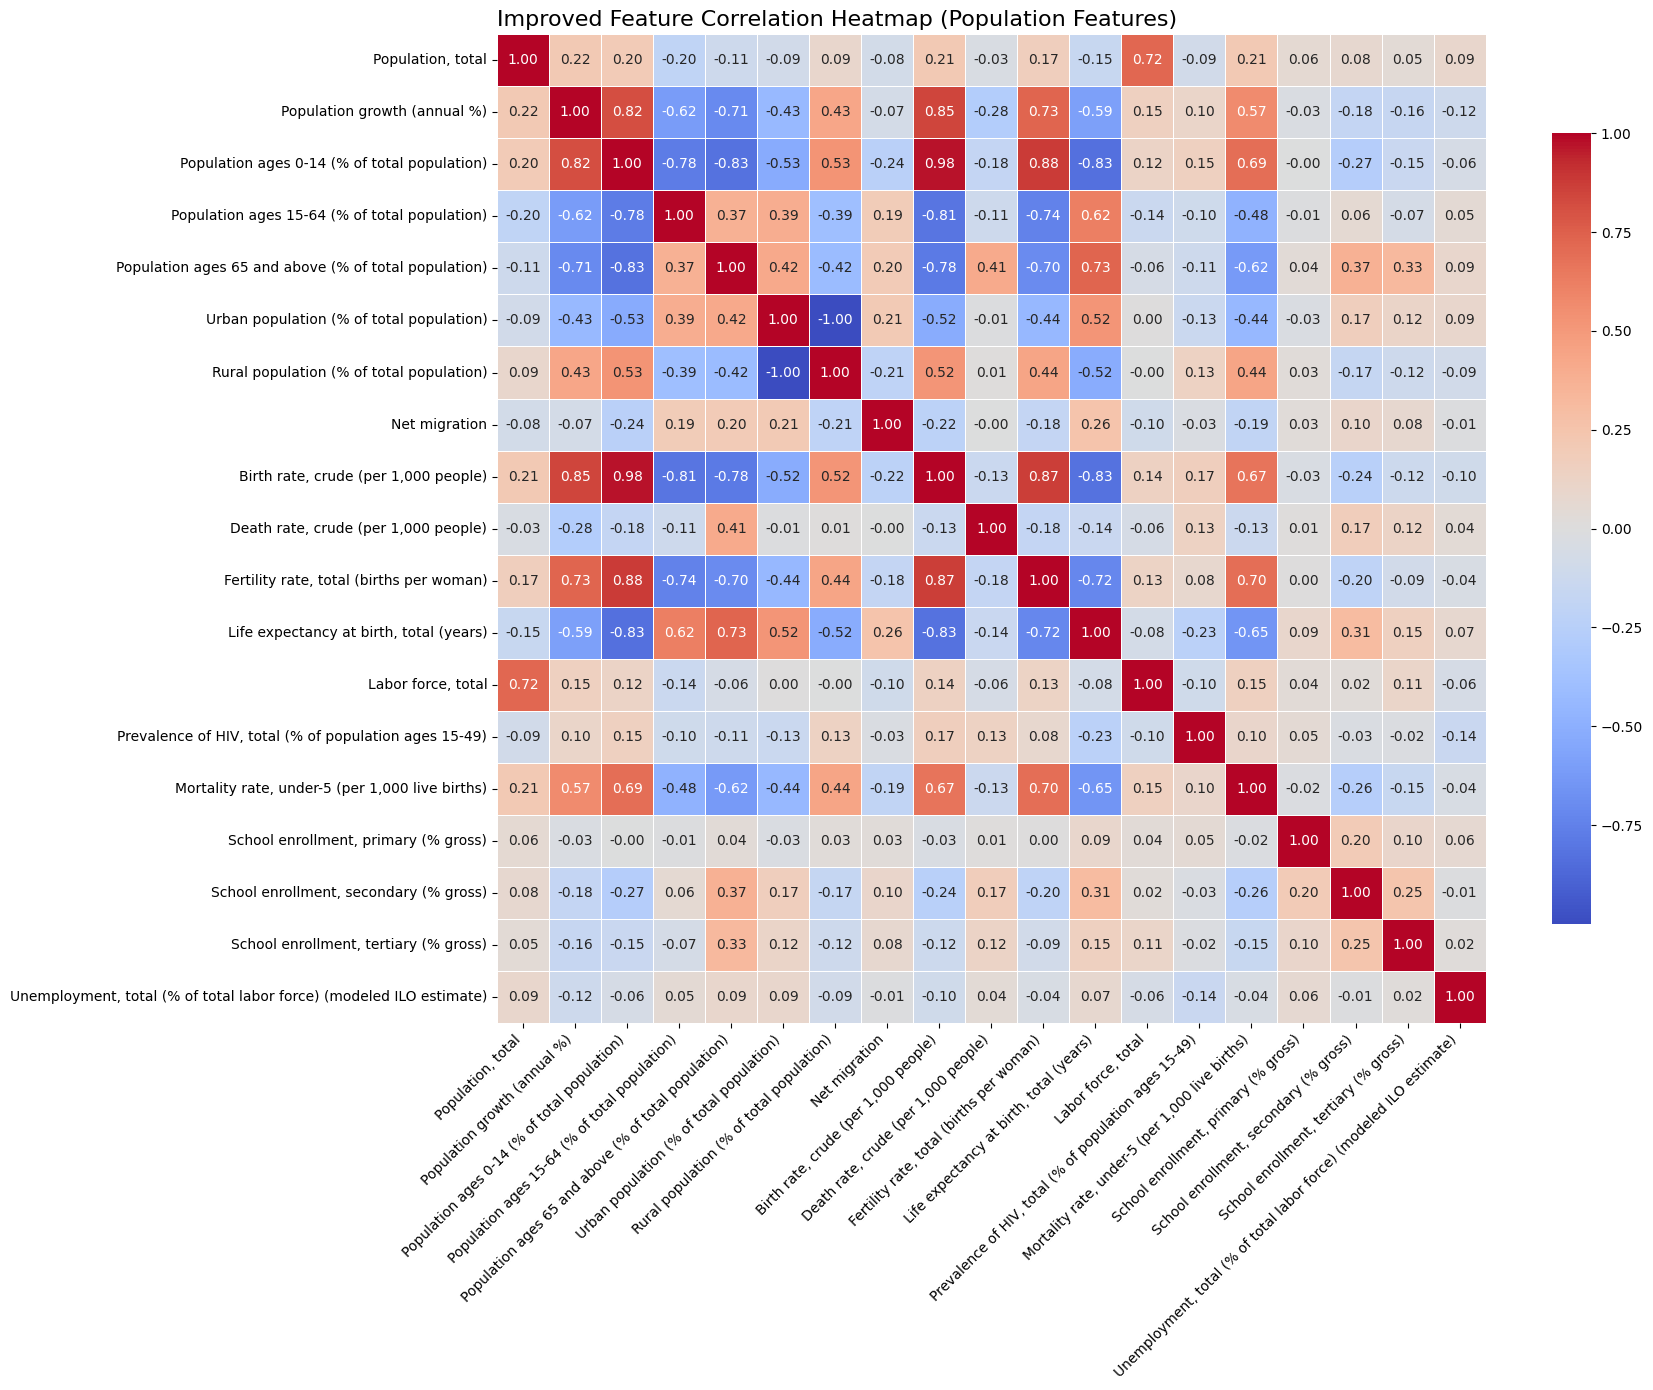

In [23]:
# Subset your DataFrame to these features
df_pop = df[population_features]

# Compute the correlation matrix
corr_matrix = df_pop.corr()

plt.figure(figsize=(18, 14))  # ขยายขนาดภาพ
sns.heatmap(
    corr_matrix,              # correlation matrix ที่คำนวณไว้แล้ว
    annot=True,               # แสดงตัวเลขในช่อง
    fmt=".2f",                # ทศนิยม 2 ตำแหน่ง
    cmap='coolwarm',          # สีแดง-น้ำเงิน
    linewidths=0.5,           # ช่องแต่ละช่องมีเส้นขอบบาง ๆ
    cbar_kws={"shrink": 0.8}, # ย่อแถบสีให้เล็กลง
    square=True               # ช่องเป็นสี่เหลี่ยมจัตุรัส
)

# จัดมุมตัวอักษรให้ไม่ชนกัน
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Improved Feature Correlation Heatmap (Population Features)", fontsize=16, loc='left')
plt.tight_layout()
plt.show()

In [24]:
#List of features pair with high correlation
corr_abs = corr_matrix.abs()

mask = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)

high_corr_pairs = corr_abs.where(mask).stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.7]

high_corr_pairs.sort_values(by='Correlation', ascending=False)

,Feature 1,Feature 2,Correlation
80,Urban population (% of total population),Rural population (% of total population),1.000000
40,Population ages 0-14 (% of total population),"Birth rate, crude (per 1,000 people)",0.975552
42,Population ages 0-14 (% of total population),"Fertility rate, total (births per woman)",0.880415
117,"Birth rate, crude (per 1,000 people)","Fertility rate, total (births per woman)",0.869190
24,Population growth (annual %),"Birth rate, crude (per 1,000 people)",0.847986
43,Population ages 0-14 (% of total population),"Life expectancy at birth, total (years)",0.830663
118,"Birth rate, crude (per 1,000 people)","Life expectancy at birth, total (years)",0.827201
36,Population ages 0-14 (% of total population),Population ages 65 and above (% of total popul...,0.826605
18,Population growth (annual %),Population ages 0-14 (% of total population),0.819375
55,Population ages 15-64 (% of total population),"Birth rate, crude (per 1,000 people)",0.810948


In [25]:
remove_features = [
    'Rural population (% of total population)',
    'Birth rate, crude (per 1,000 people)',
    'Fertility rate, total (births per woman)',
    'Population ages 15-64 (% of total population)',
    'Labor force, total'
]

input_vars = [var for var in population_features if var not in remove_features]
df = df[input_vars].copy()
df.to_csv("pop_after_remove_high_corr.csv", index=False)
df

,"Population, total",Population growth (annual %),Population ages 0-14 (% of total population),Population ages 65 and above (% of total population),Urban population (% of total population),Net migration,"Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)","Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,40099462.0,2.85,43.42,2.40,26.31,-563.5,7.34,61.98,0.1,59.6,99.91,95.23,55.27,11.930
1,2811666.0,-0.93,16.28,16.23,62.97,-10612.0,11.33,76.46,0.1,9.5,97.11,97.67,59.97,12.470
2,44177969.0,1.66,30.71,6.18,74.26,-18797.0,4.55,76.38,0.1,22.3,107.00,95.23,54.21,13.610
3,45035.0,0.86,27.51,6.84,87.17,-1646.0,8.13,72.54,0.4,15.4,99.91,95.23,55.27,6.035
4,79034.0,1.70,13.07,14.54,87.86,1377.0,8.13,72.54,0.4,2.8,88.88,97.33,55.27,6.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,105870.0,-0.40,19.24,20.00,96.04,-224.0,8.60,80.07,0.4,15.4,99.91,95.23,55.27,13.930
212,4922749.0,2.46,39.14,3.48,77.00,-12369.0,3.82,73.47,0.4,14.8,93.13,90.19,43.51,6.035
213,32981641.0,2.14,39.87,2.69,38.55,-563.5,6.85,63.75,0.1,44.6,99.91,95.23,55.27,6.035
214,19473125.0,2.84,43.26,1.74,45.19,9015.0,6.97,61.22,0.4,57.2,99.91,95.23,55.27,5.200


# Machine Learning Model

In [26]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Dendogram

In [27]:
# function plot dendrogram for agglomerative clustering
def plot_dendrogram(X, method='ward', color_threshold=None, country_names=None):
    Z = linkage(X, method=method)
    plt.figure(figsize=(20, 10))
    dendrogram(Z, leaf_rotation=90, color_threshold=color_threshold, labels=country_names)  # leaf_rotation=90 for clearer labels if you have many rows
    plt.title(f"Dendrogram using '{method}' linkage")
    plt.axhline(y=color_threshold, color='r', linestyle='--', label=f'Auto threshold: {color_threshold:.2f}')
    plt.text(0.5, 0.95, f'Threshold: {color_threshold:.2f}', ha='center', va='top', transform=plt.gca().transAxes)
    plt.xlabel("Samples (Countries)")
    plt.ylabel("Distance")
    plt.show()

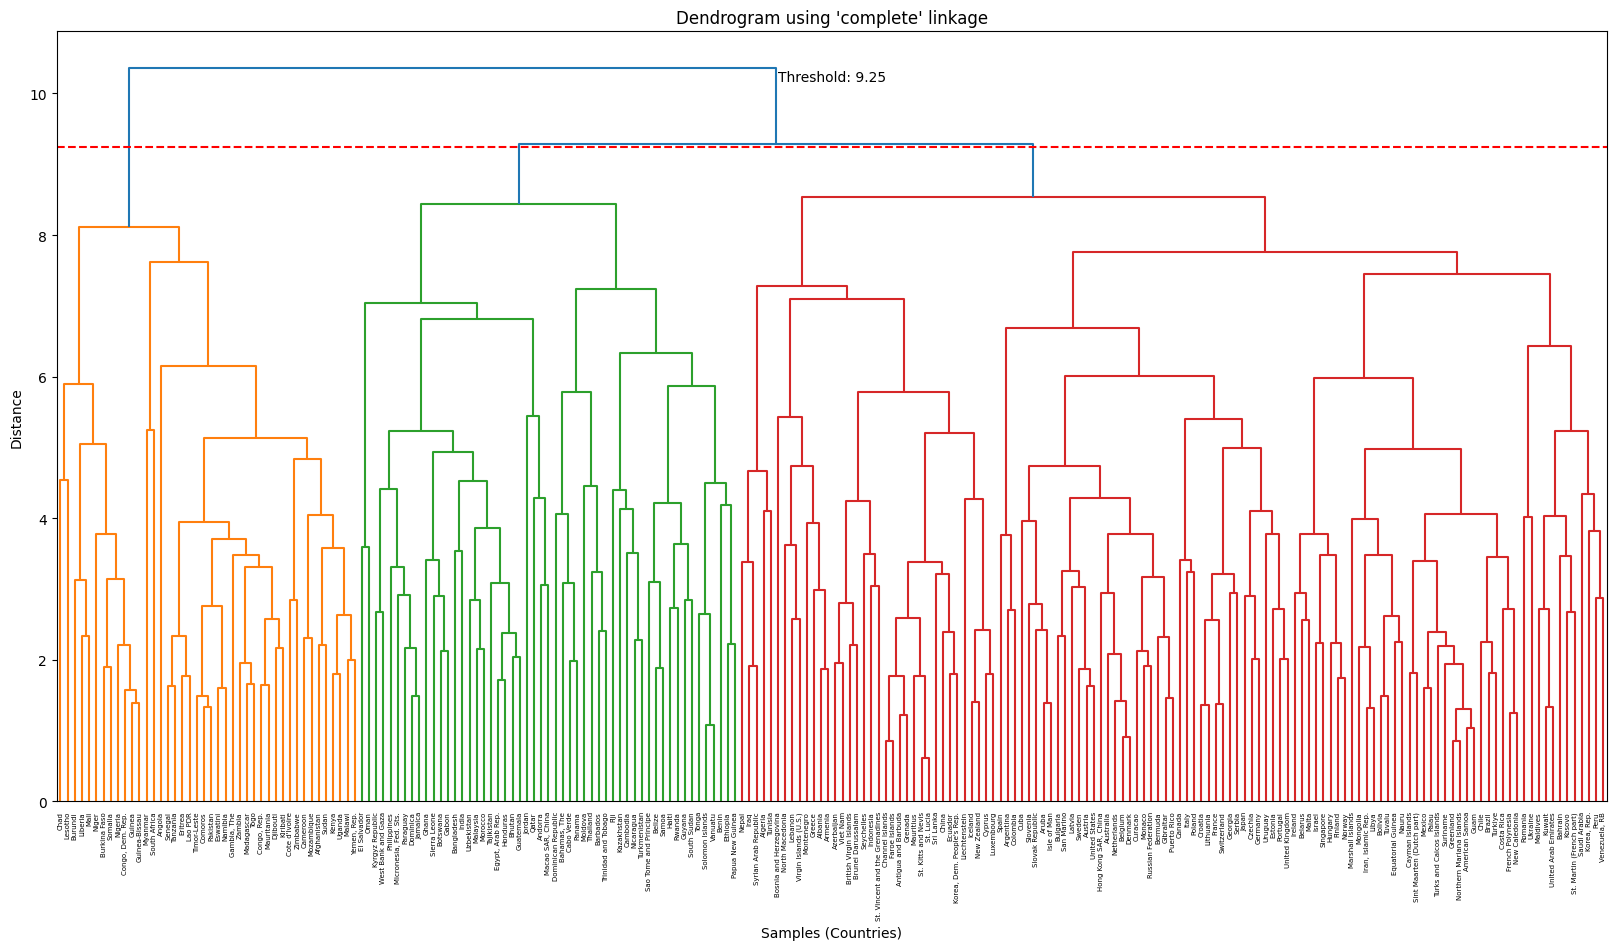

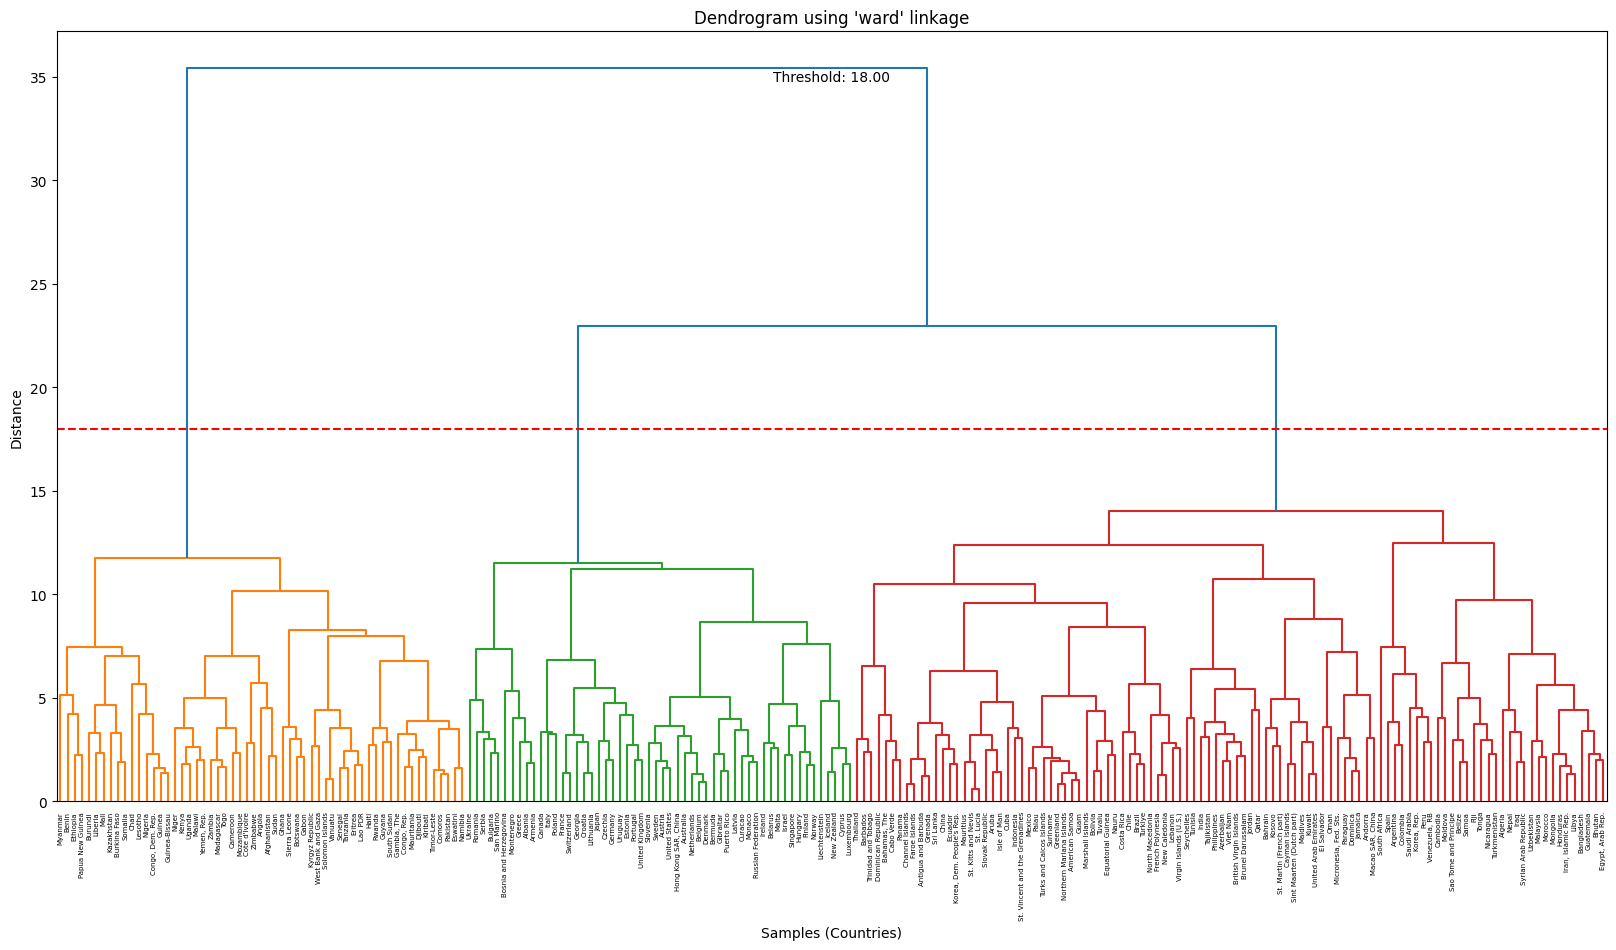

In [28]:
# try all linkage methods
linkage_methods = [('complete', 9.25), ('ward', 18)]

for method in linkage_methods:
    plot_dendrogram(df_scaled, method=method[0], color_threshold=method[1], country_names=countries)

In [29]:
# get linkage method with best threshold
best_linkage_methods = [('complete', 9.25), ('ward', 18)]

## Clustering

In [30]:
# function perform agglomerative clustering 
def do_agglomerative_clustering(X, linkage='ward', distance_threshold=0):
    model = AgglomerativeClustering(linkage=linkage, distance_threshold=distance_threshold, n_clusters=None)
    labels = model.fit_predict(X)
    
    return labels

In [31]:
# apply agglomerative clustering
df_result = pd.DataFrame({'Country Name': countries})
df_result.loc[:, input_vars] = df

for method in best_linkage_methods:
    labels = do_agglomerative_clustering(df_scaled, linkage=method[0], distance_threshold=method[1])
    
    df_result.loc[:, f'Cluster {method[0]}'] = labels

    print(f"Agglomerative Clustering with '{method[0]}' linkage:")
    print(df_result[f'Cluster {method[0]}'].value_counts())
    print()

Agglomerative Clustering with 'complete' linkage:
Cluster complete
0    121
2     53
1     42
Name: count, dtype: int64

Agglomerative Clustering with 'ward' linkage:
Cluster ward
0    105
1     57
2     54
Name: count, dtype: int64



In [32]:
df_result

,Country Name,"Population, total",Population growth (annual %),Population ages 0-14 (% of total population),Population ages 65 and above (% of total population),Urban population (% of total population),Net migration,"Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)","Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Cluster complete,Cluster ward
0,Afghanistan,40099462.0,2.85,43.42,2.40,26.31,-563.5,7.34,61.98,0.1,59.6,99.91,95.23,55.27,11.930,1,1
1,Albania,2811666.0,-0.93,16.28,16.23,62.97,-10612.0,11.33,76.46,0.1,9.5,97.11,97.67,59.97,12.470,0,2
2,Algeria,44177969.0,1.66,30.71,6.18,74.26,-18797.0,4.55,76.38,0.1,22.3,107.00,95.23,54.21,13.610,0,0
3,American Samoa,45035.0,0.86,27.51,6.84,87.17,-1646.0,8.13,72.54,0.4,15.4,99.91,95.23,55.27,6.035,0,0
4,Andorra,79034.0,1.70,13.07,14.54,87.86,1377.0,8.13,72.54,0.4,2.8,88.88,97.33,55.27,6.035,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Virgin Islands (U.S.),105870.0,-0.40,19.24,20.00,96.04,-224.0,8.60,80.07,0.4,15.4,99.91,95.23,55.27,13.930,0,0
212,West Bank and Gaza,4922749.0,2.46,39.14,3.48,77.00,-12369.0,3.82,73.47,0.4,14.8,93.13,90.19,43.51,6.035,2,1
213,"Yemen, Rep.",32981641.0,2.14,39.87,2.69,38.55,-563.5,6.85,63.75,0.1,44.6,99.91,95.23,55.27,6.035,1,1
214,Zambia,19473125.0,2.84,43.26,1.74,45.19,9015.0,6.97,61.22,0.4,57.2,99.91,95.23,55.27,5.200,1,1


,"Population, total",Population growth (annual %),Population ages 0-14 (% of total population),Population ages 65 and above (% of total population),Urban population (% of total population),Net migration,"Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)","Prevalence of HIV, total (% of population ages 15-49)","Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","School enrollment, tertiary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
Cluster,,,,,,,,,,,,,,
0,-0.091262,-0.176273,-0.201236,-0.180250,0.117976,0.041398,-0.310115,0.212488,0.011882,-0.201353,0.110716,-0.135025,-0.361947,0.114169
1,0.303651,1.150398,1.313101,-0.957096,-0.852536,-0.375108,0.042542,-1.235953,0.323593,1.162996,-0.174562,-0.311837,-0.027048,-0.243197
2,-0.143067,-0.871555,-0.994759,1.360755,0.670502,0.315451,0.558096,0.891445,-0.364674,-0.836088,-0.031021,0.591711,0.732338,0.034712


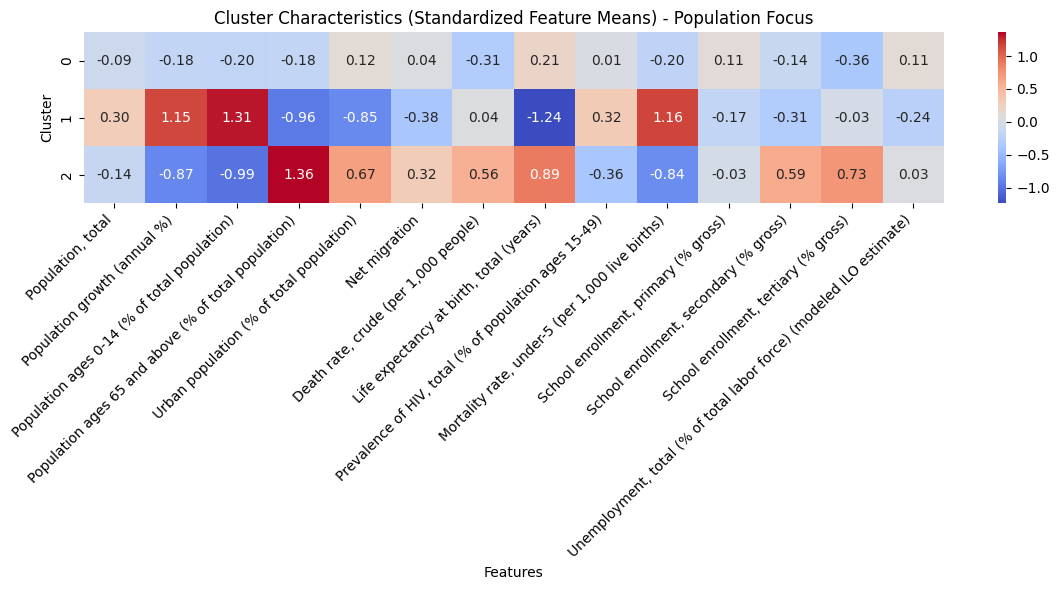

In [42]:
# ใช้คอลัมน์ 'Cluster ward' สำหรับการวิเคราะห์
cluster_col = 'Cluster ward'

# แยกเฉพาะคอลัมน์ตัวแปรที่เป็นตัวเลข
numeric_features = df_result.drop(columns=['Country Name', 'Cluster complete', 'Cluster ward'])

# Normalize ข้อมูล
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)
scaled_df['Cluster'] = df_result[cluster_col]

# สร้างโปรไฟล์เฉลี่ยของแต่ละคลัสเตอร์
cluster_profiles = scaled_df.groupby('Cluster').mean()

# แสดงผลลัพธ์ใน Jupyter
display(cluster_profiles)

# วาด heatmap สำหรับวิเคราะห์ characteristic
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Cluster Characteristics (Standardized Feature Means) - Population Focus")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Evaluation

In [33]:
silhouette_complete = silhouette_score(df_scaled, df_result['Cluster complete'])
silhouette_ward = silhouette_score(df_scaled, df_result['Cluster ward'])
print(f"Silhouette Score of complete linkage: {silhouette_complete:.4f}")
print(f"Silhouette Score of ward linkage: {silhouette_ward:.4f}")

Silhouette Score of complete linkage: 0.1332
Silhouette Score of ward linkage: 0.1265


In [34]:
davies_complete = davies_bouldin_score(df_scaled, df_result['Cluster complete'])
davies_ward = davies_bouldin_score(df_scaled, df_result['Cluster ward'])
print(f"Davies-Bouldin Score for complete linkage: {davies_complete:.4f}")
print(f"Davies-Bouldin Score for ward linkage: {davies_ward:.4f}")

Davies-Bouldin Score for complete linkage: 2.3872
Davies-Bouldin Score for ward linkage: 2.0884


In [35]:
input_vars

['Population, total',
 'Population growth (annual %)',
 'Population ages 0-14 (% of total population)',
 'Population ages 65 and above (% of total population)',
 'Urban population (% of total population)',
 'Net migration',
 'Death rate, crude (per 1,000 people)',
 'Life expectancy at birth, total (years)',
 'Prevalence of HIV, total (% of population ages 15-49)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'School enrollment, primary (% gross)',
 'School enrollment, secondary (% gross)',
 'School enrollment, tertiary (% gross)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)']

In [36]:
df_result.to_csv("res.csv",index=False)